In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'D:\Courses\Fall 19\ELEG 815 Statistical Learning\HW5\FilesHw5'
train_data = pd.read_csv(path+'\DigitsTraining.csv',header=None)
test_data = pd.read_csv(path+'\DigitsTesting.csv',header=None)

In [3]:
def Get_Two_Digits(data):
    dataset = pd.DataFrame()
    for i in range(len(data)):
        if int(data.iloc[i][0]) == 2 or int(data.iloc[i][0]) == 1:
            # https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas
            """Pandas doesnt append in place. Have to store in a new variable"""
            dataset = dataset.append(data.iloc[i],ignore_index=True)
    return dataset
raw_training_dataset = Get_Two_Digits(train_data)
raw_testing_dataset = Get_Two_Digits(test_data)

In [4]:
def Extract_features(raw_dataset):
    len_dataset = len(raw_dataset)
    number_of_features = 2
    dataset = np.empty((len_dataset,number_of_features + 1))
    true_labels = np.empty((len_dataset,))
    for index,image_pixels in raw_dataset.iterrows():
        """---------------------- Average Intensity-------------------------"""
        avg_intensity = sum(image_pixels[1:])/len(image_pixels[1:])

        """-----------------------Average Symmetry--------------------------"""
        img = np.array(image_pixels[1:]).reshape((16,16))
        flipped_image = np.fliplr(img)
        flipped_image_pixels = flipped_image.flatten()
        image_pixels = np.array(image_pixels)
        asymmetry = sum(np.absolute(image_pixels[1:] - flipped_image_pixels))/len(image_pixels[1:])
        symmetry = 1 - asymmetry
        dataset[index][0] = 1
        dataset[index][1] = 1 - avg_intensity           # Higher value of intensity means there are more white pixels than black pixels because white = 255 and black = 0
        dataset[index][2] = symmetry
        if int(image_pixels[0]) == 2:                   # Suppose digit 2 has label = -1
            true_labels[index] = -1
        else:
            true_labels[index] = 1                      # Suppose digit 6 has label +1
    return dataset,true_labels

train_dataset,train_true_labels = Extract_features(raw_training_dataset)
test_dataset,test_true_labels = Extract_features(raw_testing_dataset)
print(train_dataset.shape)
print(test_dataset.shape)

(1736, 3)
(462, 3)


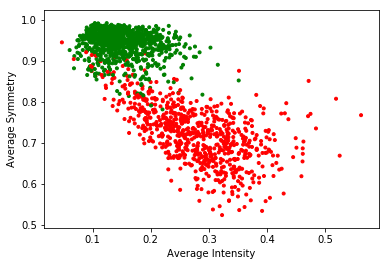

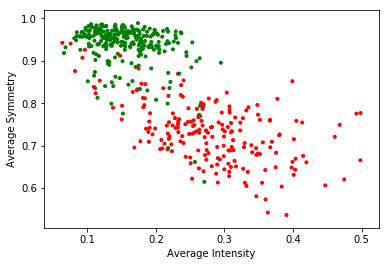

In [5]:
def Set_Colors_Array(true_labels):
    col = [None]*len(true_labels)
    for i in range(len(true_labels)):
        if int(true_labels[i]) == -1:
            col[i] = 'r'
        else:
            col[i] = 'g'
    return col
colors_train = Set_Colors_Array(train_true_labels)
colors_test = Set_Colors_Array(test_true_labels)
def Scatter_Plot(dataset,colors):           # Red = digit 2 and Green = digit 1
    plt.scatter(dataset[:,1],dataset[:,2],c= colors,marker='.')
    plt.xlabel('Average Intensity')
    plt.ylabel('Average Symmetry')
    plt.show()
Scatter_Plot(train_dataset,colors_train)
Scatter_Plot(test_dataset,colors_test)

# (a) Perceptron Learning Algorithm (Binary Error)

In [6]:
def Perceptron_Learner(dataset,test_dataset,test_labels,true_labels):
    np.random.seed(1111)
    W_rand = np.random.normal(0,0.0005,(dataset.shape[1],))
    W_rand[0] = 0.1             # bias
    W = W_rand
    iterations = 200
    E_in = [0]*iterations
    E_out = [0]*iterations
    print('Intial weight vector W :',W)
    for iteration in range(iterations):
        for index,point in enumerate(dataset):
            if np.sign(np.dot(W.T,point)) != true_labels[index]:
                W = W + np.dot(true_labels[index],point)
        count = 0
        for index,point in enumerate(dataset):
            if np.sign(np.dot(W.T,point)) != true_labels[index]:
                count += 1
        E_in[iteration] = (count/len(dataset))*100
        cnt = 0
        for index,point in enumerate(test_dataset):
            if np.sign(np.dot(W.T,point)) != test_labels[index]:
                cnt += 1
        E_out[iteration] = (cnt/len(test_dataset))*100
    return W,E_in,E_out

Intial weight vector W : [ 0.1        -0.00053649  0.0003951 ]
Final weight vector W : [-22.9          0.49383655  27.34182088]
Norm of Weight vector is : 35.668319887833064


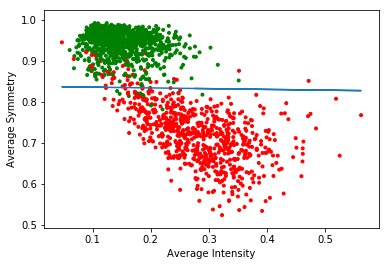

In [7]:
W,E_in,E_out = Perceptron_Learner(train_dataset,test_dataset,test_true_labels,train_true_labels)
print('Final weight vector W :',W)
def Plot_Results(dataset,colors):
    x = dataset[:,1]
    y = dataset[:,2]
    plt.scatter(x,y,c= colors,marker='.')
    plt.xlabel('Average Intensity')
    plt.ylabel('Average Symmetry')
    X = dataset
    Y = [0]*len(X)
    for i in range(len(X)):
       Y[i] = (-W[0]*X[i][0]- W[1]*X[i][1])/W[2]
    plt.plot(x,Y)
Plot_Results(train_dataset,colors_train)
print('Norm of Weight vector is :',np.linalg.norm(W))

In [8]:
def Error(dataset,true_labels,W):
    count = 0
    for index,point in enumerate(dataset):
        if np.sign(np.dot(W.T,point)) != true_labels[index]:
            count += 1
    return (count/len(dataset))*100
print('Error of Training Data with 2 features :',Error(train_dataset,train_true_labels,W))

Error of Training Data with 2 features : 3.052995391705069


In [9]:
def Test(W,test_dataset,test_true_labels):
    count = 0
    for index,point in enumerate(test_dataset):
        if np.sign(np.dot(W.T,point)) != test_true_labels[index]:
            count += 1
    return (count/len(test_dataset))*100
print('Error of Testing Data 2 features :',Test(W,test_dataset,test_true_labels))

Error of Testing Data 2 features : 6.493506493506493


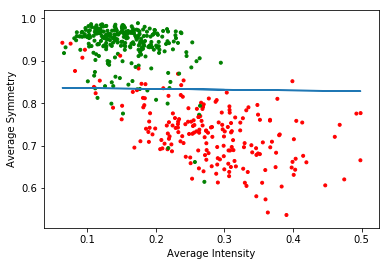

In [10]:
Plot_Results(test_dataset,colors_test)

# (b) E_in vs E_out PLA

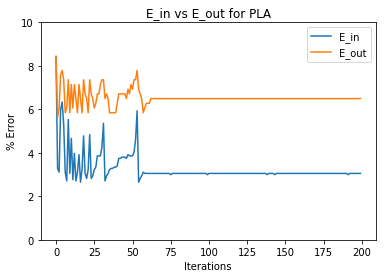

In [11]:
def Plot_Errors(E_in,E_out,title):
    x = [i for i in range(200)]
    axes = plt.gca()
    axes.set_ylim([0,10])
    plt.plot(x,E_in)
    plt.plot(x,E_out)
    plt.legend(['E_in','E_out'])
    plt.xlabel('Iterations')
    plt.ylabel('% Error')
    plt.title(title)
    plt.show()
Plot_Errors(E_in,E_out,'E_in vs E_out for PLA')

Get E_in vs E_out for PLA using Linear Regression Weights

Intial Linear Regression weights : [ 0.1        -0.30845908  7.1851853 ]
Final weight vector W using Linear Reg as initial weights : [-22.9          0.4934335   27.33809546]
Norm of W using Linear Reg as initial weights : 35.66545863706394


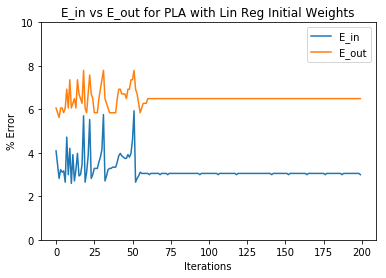

Error of Training Data with 2 features using Linear Regression weights: 2.995391705069124
Error of Testing Data 2 features using Linear Regression weights: 6.493506493506493


In [12]:
linear_regression_weights = np.array([-5.89094936,-0.30845908,7.1851853 ])

def Perceptron_Learner_using_W_lin(dataset,test_dataset,test_labels,true_labels,W_init):
    np.random.seed(1111)
    W_rand = W_init #np.random.normal(0,0.0005,(dataset.shape[1],))
    W_rand[0] = 0.1             # bias
    W = W_rand
    iterations = 200
    E_in = [0]*iterations
    E_out = [0]*iterations
    print('Intial Linear Regression weights :',W)
    for iteration in range(iterations):
        for index,point in enumerate(dataset):
            if np.sign(np.dot(W.T,point)) != true_labels[index]:
                W = W + np.dot(true_labels[index],point)
        count = 0
        for index,point in enumerate(dataset):
            if np.sign(np.dot(W.T,point)) != true_labels[index]:
                count += 1
        E_in[iteration] = (count/len(dataset))*100
        cnt = 0
        for index,point in enumerate(test_dataset):
            if np.sign(np.dot(W.T,point)) != test_labels[index]:
                cnt += 1
        E_out[iteration] = (cnt/len(test_dataset))*100
    return W,E_in,E_out
W_using_Lin_Reg,E_in_lin,E_out_lin = Perceptron_Learner_using_W_lin(train_dataset,test_dataset,test_true_labels,train_true_labels,linear_regression_weights)
print('Final weight vector W using Linear Reg as initial weights :',W_using_Lin_Reg)
print('Norm of W using Linear Reg as initial weights :',np.linalg.norm(W_using_Lin_Reg))

Plot_Errors(E_in_lin,E_out_lin,'E_in vs E_out for PLA with Lin Reg Initial Weights')
print('Error of Training Data with 2 features using Linear Regression weights:',Error(train_dataset,train_true_labels,W_using_Lin_Reg))
print('Error of Testing Data 2 features using Linear Regression weights:',Test(W_using_Lin_Reg,test_dataset,test_true_labels))

# (f)  Repeat part (a) PLA with additional feature
Extract Additional Feature

In [13]:
def Extract_Additonal_Feature(existing_dataset):
    new_feature = np.empty((len(existing_dataset),))
    new_dataset = np.empty((len(existing_dataset),existing_dataset.shape[1]+1))
    new_dataset[:,:3] = existing_dataset
    for i in range(len(existing_dataset)):
        new_feature[i] = existing_dataset[i][2]**2
        new_dataset[i][3] = new_feature[i]
    return new_dataset
        
new_train_dataset = Extract_Additonal_Feature(train_dataset)
new_test_dataset = Extract_Additonal_Feature(test_dataset)

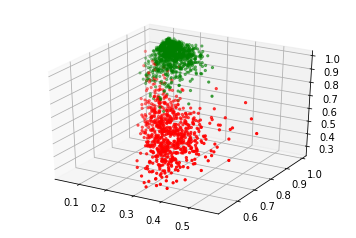

In [14]:
from mpl_toolkits.mplot3d import Axes3D
# https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
def Plot_New_Data(dataset):
    x = dataset[:,1]
    y = dataset[:,2]
    z = dataset[:,3]
    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z,c=colors_train,marker='.')
Plot_New_Data(new_train_dataset)

In [15]:
W,E_in,E_out = Perceptron_Learner(new_train_dataset,new_test_dataset,test_true_labels,train_true_labels)
print('Final weight vector W :',W)

Intial weight vector W : [ 0.1        -0.00053649  0.0003951  -0.00043913]
Final weight vector W : [-16.9          1.57353382   3.05798885  20.07972734]


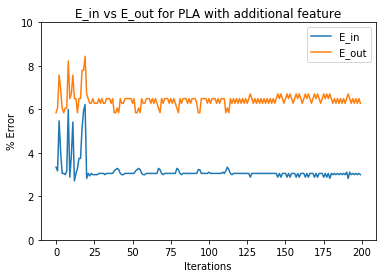

In [16]:
Plot_Errors(E_in,E_out,'E_in vs E_out for PLA with additional feature')

In [17]:
print('Error of Training Data with 3 features :',Error(new_train_dataset,train_true_labels,W))
print('Error of Testing Data with 3 features :',Test(W,new_test_dataset,test_true_labels))

Error of Training Data with 3 features : 2.995391705069124
Error of Testing Data with 3 features : 6.277056277056277


Intial Linear Regression weights : [  0.1         -0.3479321  -22.18470203  18.03110353]
Final weight vector W using Linear Reg as initial weights : [ -6.9         -2.0341489  -17.50873719  32.13555429]
Norm of W using Linear Reg as initial weights : 37.29607873962409


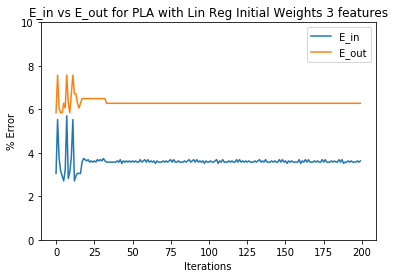

Error of Training Data with 3 features using Linear Regression weights: 3.6290322580645165
Error of Testing Data 3 features using Linear Regression weights: 6.277056277056277


In [18]:
def Extract_Additonal_Feature(existing_dataset):
    new_feature = np.empty((len(existing_dataset),))
    new_dataset = np.empty((len(existing_dataset),existing_dataset.shape[1]+1))
    new_dataset[:,:3] = existing_dataset
    for i in range(len(existing_dataset)):
        new_feature[i] = existing_dataset[i][2]**2
        new_dataset[i][3] = new_feature[i]
    return new_dataset
        
new_train_dataset = Extract_Additonal_Feature(train_dataset)
new_test_dataset = Extract_Additonal_Feature(test_dataset)

w_additional_feature = np.array([ 5.7895822,-0.3479321,-22.18470203,18.03110353])

W_using_Lin_Reg_3feat,E_in_lin_3feat,E_out_lin_3feat = Perceptron_Learner_using_W_lin(new_train_dataset,new_test_dataset,test_true_labels,train_true_labels,w_additional_feature)
print('Final weight vector W using Linear Reg as initial weights :',W_using_Lin_Reg_3feat)
print('Norm of W using Linear Reg as initial weights :',np.linalg.norm(W_using_Lin_Reg_3feat))

Plot_Errors(E_in_lin_3feat,E_out_lin_3feat,'E_in vs E_out for PLA with Lin Reg Initial Weights 3 features')
print('Error of Training Data with 3 features using Linear Regression weights:',Error(new_train_dataset,train_true_labels,W_using_Lin_Reg_3feat))
print('Error of Testing Data 3 features using Linear Regression weights:',Test(W_using_Lin_Reg_3feat,new_test_dataset,test_true_labels))